In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
matplotlib inline

# Exercise 3.3.15

## Plotting the solution we obtained

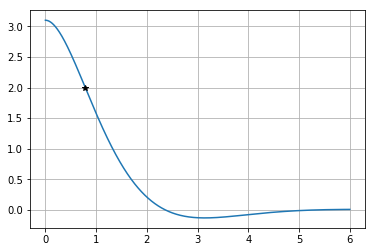

In [3]:
tt = np.linspace(0,6,1000)
plt.figure()
plt.grid()
plt.plot(tt,
         np.sqrt(2)*np.exp(-(tt-np.pi/4))*(np.cos(tt) + np.sin(tt)))
plt.plot(np.pi/4, 2, 'k*')

## Making Python compute a solution numerically

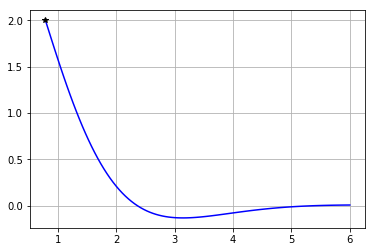

In [4]:
## Second order equation must be converted into a system of first order equations
def RHS3_3_15(U, T):
    return [U[1],
            -2*U[0] - 2*U[1]]

# Compute solution numerically
tt = np.linspace(np.pi/4,6, 100)
sol = scipy.integrate.odeint(RHS3_3_15, [2,-2], tt)
plt.figure(); plt.grid()
plt.plot(tt,sol[:,0], 'b')
plt.plot(np.pi/4, 2, 'k*')

# Mechanical / Electrical Vibrations

## Comparing unforced oscillations with and without damping

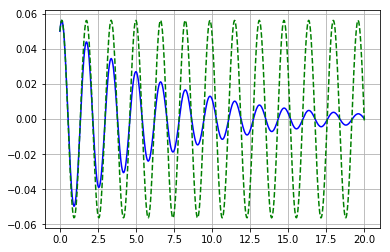

In [5]:
plt.figure(); plt.grid();
tt = np.linspace(0, 20, 500)

# ADJUST: Right-hand side (y''+0.3y'+15y=0 converted to 1st order system)
RHS = lambda U, T : [U[1], -15*U[0] - 0.3*U[1]];
sol = scipy.integrate.odeint(RHS, [0.05,0.1], tt)
plt.plot(tt,sol[:,0], 'b-')  # with damping - in blue

# ADJUST:
RHS = lambda U, T : [U[1],   -15*U[0] - 0*U[1]];
sol = scipy.integrate.odeint(RHS, [0.05,0.1], tt)
plt.plot(tt,sol[:,0], 'g--') # without damping - in green

## Forcing at different frequencies

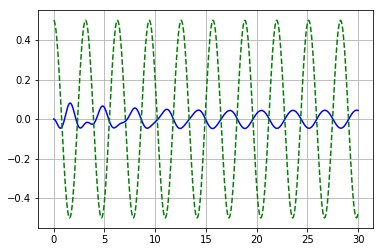

In [6]:
# ADJUST: Frequency w of the forcing term
w = 2;
RHS = lambda U, T : [U[1],   -15*U[0] - 0.3*U[1] - 1/2*np.cos(w*T)];

# Compute solution numerically, plot against the forcing term
tt = np.linspace(0, 30, 500)
sol = scipy.integrate.odeint(RHS, [0.0,0.0], tt)
plt.figure(); plt.grid(); 
plt.plot(tt,sol[:,0], 'b')
plt.plot(tt,1/2*np.cos(w*tt), 'g--')

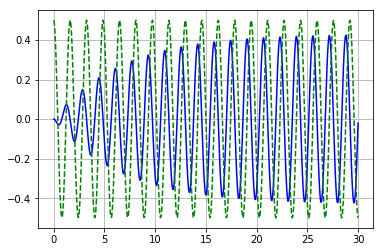

In [7]:
# ADJUST: Frequency of the forcing term
w = np.sqrt(15);  # Close to the resonance
RHS = lambda U, T : [U[1],   -15*U[0] - 0.3*U[1] - 1/2*np.cos(w*T)];

# Compute solution numerically, plot against the forcing term
tt = np.linspace(0, 30, 500)
sol = scipy.integrate.odeint(RHS, [0.0,0.0], tt)
plt.figure(); plt.grid(); 
plt.plot(tt,sol[:,0],'b');
plt.plot(tt,1/2*np.cos(w*tt), 'g--')

## Plotting the amplitude of the steady state response

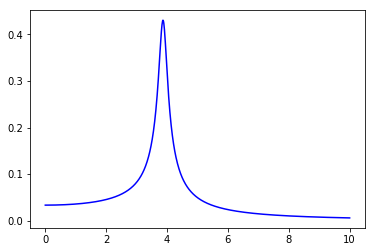

In [8]:
# ADJUST:
m=1; k=15; gamma=0.3;  F0 = 1/2;
ws = np.linspace(0, 10, 1000);
R = F0 / np.sqrt( (k-m*ws**2)**2 + (gamma*ws)**2 );  # Formula derived in the book / lectures
plt.plot(ws, R, 'b-')

## Exercise 3.8.13: undamped forced oscillation

#### For w=0.8 and 0.9 you see "beats", a carrier frequency whose amplitude is modulated by another oscillation.

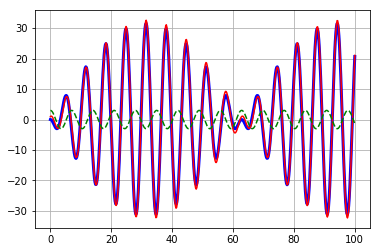

In [9]:
# ADJUST: Frequency of the foring term
w = 0.9;
RHS = lambda U, T : [U[1],   -1*U[0] - 0.0*U[1] - 3*np.cos(w*T)];

# Compute solution numerically, plot the result for two different ICs
tt = np.linspace(0, 100, 500)
sol = scipy.integrate.odeint(RHS, [0.0,0.0], tt)
plt.figure(); plt.grid(); 
plt.plot(tt,sol[:,0], 'b-', linewidth=3)
sol = scipy.integrate.odeint(RHS, [1.0,1.0], tt)
plt.plot(tt,sol[:,0], 'r-')
# Plot the forcing term
plt.plot(tt,3*np.cos(w*tt), 'g--')

# Piecewise-defined functions (Exercise 6.3.8)

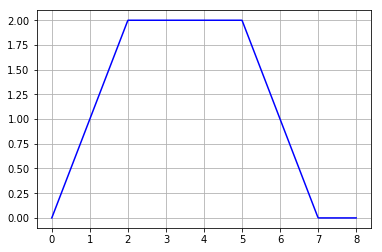

In [10]:
f = lambda t : t*np.heaviside(t,1) + (2-t)*np.heaviside(t-2,1) \
    + (5-t)*np.heaviside(t-5,1) + (t-7)*np.heaviside(t-7,1);

tt = np.linspace(0,8,500);
plt.figure(); plt.grid();
plt.plot(tt,f(tt), 'b-')

# Linear equation with discontinuous forcing (Sec 6.4 Example 1)

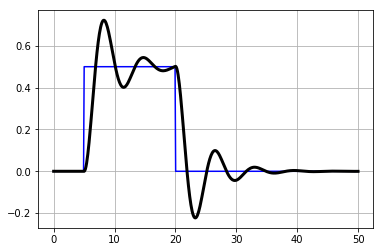

In [11]:
g = lambda T : np.heaviside(T-5,1) - np.heaviside(T-20,1)
RHS = lambda U, T : [U[1],   (g(T) - U[1] - 2*U[0])/2];

plt.figure(); plt.grid();
tt = np.linspace(0, 50, 500);
sol = scipy.integrate.odeint(RHS, [0.0,0.0], tt)
plt.plot(tt,g(tt)/2, 'b-')
plt.plot(tt,sol[:,0], 'k-', linewidth=3)